## 1.문제 정의 
- 생존자와 사망자를 예측하자


## 2. 데이터 수집

In [1]:
import pandas as pd
train =pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [2]:
train.shape, test.shape

((891, 12), (418, 11))

In [3]:
#앞 숫자 데이터의 겟수니까 달라도 되는데 뒤의 숫자는 컬럼 이여서 다르면 안됨

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#이제 train으로 학습하고 test로 테스트 
#이제 test에는 정답이 없다 알고 싶으면 이거 케글에 올려야 험

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
PassengerId = 좌석 번호 sibsp = 함께 탑승한 형제 또는 배우자의 수 parch =함께 탑승한 부모 또는 자녀의 수
Cabin =선실번호


SyntaxError: invalid syntax (695767434.py, line 1)

In [ ]:
객실의 등급: 아래로 떨어질수록

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer 
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>    

# 데이터 전처리

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#결측치 처리 해야 하는 컬럼: age cabin Embarked
#타입 처리해야 하는 컬럼: name, Sex, Ticket, Cabin, Embarked

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#결측치 처리 해야 하는 컬럼: age Fare, Cabin 
#타입 처리해야 하는 컬럼: name, Sex, Ticket, Cabin, Embarked

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Train의 embark 결측치 제거하기 

In [12]:
train["Embarked"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [13]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
#그냥 별로 차이가 없어서 임의로 채우자
#최빈값으로 채우기

In [15]:
#train["Embarked"]=train["Embarked"].fillna('S')
#이렇게 담아주던지 이렇게 iniplace속성 사용
train["Embarked"].fillna('S',inplace=True)

In [16]:
#Fare먼저 처리하고 C공통인 다른 결측치 제거하기

In [17]:
test['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
417 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [18]:
#최빈값이 없다
test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

## Fare에서는 중앙값이 더 채우는게 좋음 

In [19]:
 #14.45
test["Fare"]. fillna(14.45, inplace =True)

## age결측치 채우기

In [20]:
train["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


## 결측치가 너무 많아 단순 통계치로 채우기가 힘들다

In [21]:
#상관관계를 확인하고 그에 맞게 채워보자
train.corr()

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_8968\830310742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:



age_table =train[['Pclass','Sex','Age']].groupby(by =["Pclass","Sex"]).median()
#좌석등급으로 그룹을 나누고 이것의 중앙값을 나오게 함

In [23]:
#애는 인덱스가 두개인 다중인덱스 가지고 오는 방법은 크게 다르지 않음
#각 행의 나이값을 살펴보고 나이가 결측치라면 객실등급과 상별 확인후 위에 만든 테이블 값을 사용

In [24]:
train.iloc[17]

PassengerId                              18
Survived                                  1
Pclass                                    2
Name           Williams, Mr. Charles Eugene
Sex                                    male
Age                                     NaN
SibSp                                     0
Parch                                     0
Ticket                               244373
Fare                                   13.0
Cabin                                   NaN
Embarked                                  S
Name: 17, dtype: object

In [25]:
#.apply()
#복잡한 계산을 행이나 열 단위로 진행해주는 함수
#복잡한 계산을 함수의 형태로 만들어 주어야 반영을 할 수 있음
#하나의 행에 한 사람의 데이터가 들어갈것임 

In [26]:
import numpy as np
def fill_age(person):
    if np.isnan(person['Age']):#결측치 라면
        return age_table.loc[person['Pclass'],person["Sex"]].values[0]
    else:
        return person["Age"]
    #이 index의 value값만 가져온다 
   #그냥 출력하면 arr로 나오기 때문에 어차피 하나의 데이터 밖에 없어서 인덱싱 0 추가 

In [27]:
#axis =1 행 단위로 데이터를 채워주세요 
train["Age"]= train.apply(fill_age, axis=1)
test["Age"]= test.apply(fill_age, axis=1)
#매개변수로 들어갈 값이 안들어감
#근데 이렇게 하면 고정된 값을 사용하기 때문에 오직 애 하나만 사용하겠다
#그냥 함수자체만 쓰면 함수자체를 사용하겠다는 의미
#이 apply 라는 함수가 axis =1이라는 옵션에 의해 행or열 중 하나를 이 함수 안에 집어넣음

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## cabin 결측치 채우기

In [29]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
#종류가 너무 많아 바꿔서 사용할것
#전체가 공통적인 특징을 가질수 있게 그룹화하여 사용
#앞에 붙어 있는 알파벳으로 그룹화하여 사용


In [32]:
train["Cabin"].str

In [ ]:
#그냥은 이렇게 값이 나오지만 이걸 0번에 접속하겠다라고 하면 다 나옴

In [35]:
train["Cabin"] =train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]

In [36]:
test["Cabin"].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [ ]:
#전체 891개 중에서 204개만 데이터 들어가 있었음 
#결측치가 687개 존재
#204개로 647개의 결측치를 채우는게 너무 애매한 상황
#삭제 하는것도 좋지만 그냥 결측치 자체를하나의 데이터로 생각하자

In [37]:
train["Cabin"].fillna('N', inplace = True)
test["Cabin"].fillna('N', inplace = True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 탐색적 데이터 분석

In [41]:
import seaborn as sns

In [ ]:
#matplotlib: 더 범용성이 높고, 더 많은 곳에 쓰임
             #대신 설정할게 많다(세부적으로 자세하게 다룰 수 있지만 할게 많다 다루기 어렵다)

#seaborn: 설정할게 많지 않다 다루기 쉽지만 자게하게 다를 순 없다

<Axes: xlabel='Cabin', ylabel='count'>

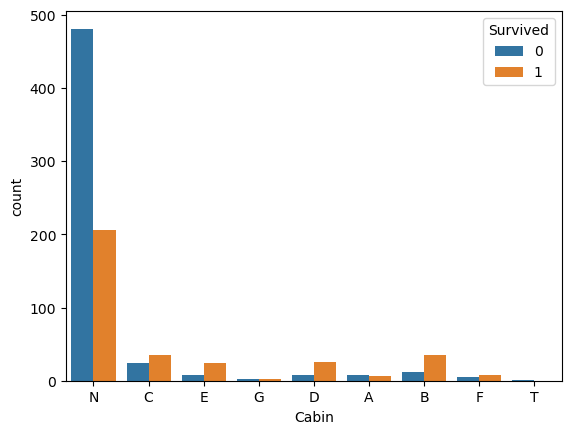

In [44]:
#클래스별로 몇개를 가지고 있는지 카운트 해줌
sns.countplot(data = train,x ="Cabin",hue ='Survived')
#hue 라는 속성을 쓰면 그 컬럼에 그 속성값이 얼마나 있는지 알 수 있다 

<Axes: xlabel='Pclass', ylabel='count'>

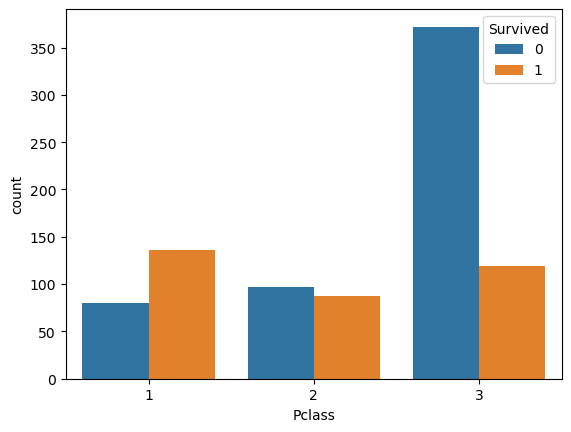

In [45]:
# Pclass 시각화
sns.countplot(data = train,x ="Pclass",hue ='Survived')

In [ ]:
#데이터가 의미있게 채워지고 나눠진건지 알아보는단계
#cabin과 pclass의 시각화

<Axes: xlabel='Cabin', ylabel='count'>

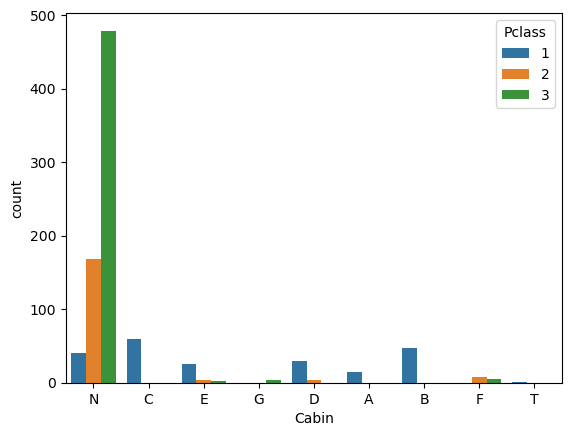

In [46]:
sns.countplot(data = train, x = "Cabin",hue = 'Pclass')
#hue 데이터를 몇가지로 나눠서 사용할 것인가ㅏ?
#cabin이 결측치 였던 사람들은 3등급에 탑승한 사람이 많고 생존확률이 낮다
#대부분의 2등급과 3등급은 Pclass가 결측치인 사람이 많다

<Axes: xlabel='Sex', ylabel='count'>

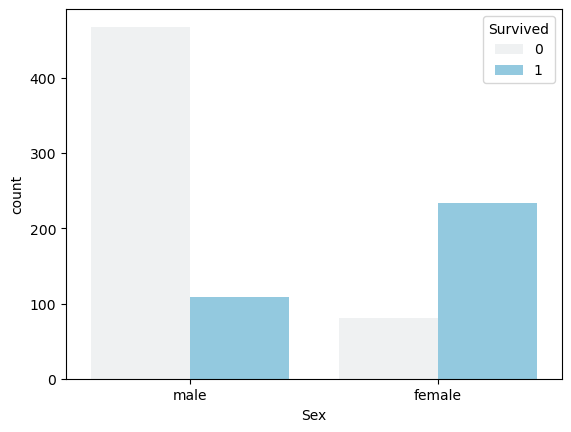

In [62]:
#Sex시각화
sns.countplot(data = train, x = "Sex",hue = 'Survived',color ='skyblue')

In [ ]:
#범주형 컬럼만 볼 수 있다
#데이터의 갯수가 적은 컬럼(나이, 요금 제외)


<Axes: xlabel='Embarked', ylabel='count'>

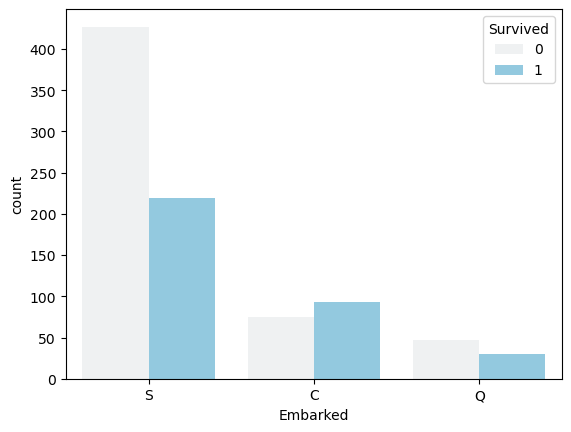

In [61]:
sns.countplot(data = train, x = "Embarked",hue = 'Survived',color ='skyblue')

In [ ]:
#탑승한 항구 도시마다의 도시자체의 격차가 있었을것이고 그에 따라 이렇게 됐다라는 추축이 가능함

<Axes: xlabel='Embarked', ylabel='count'>

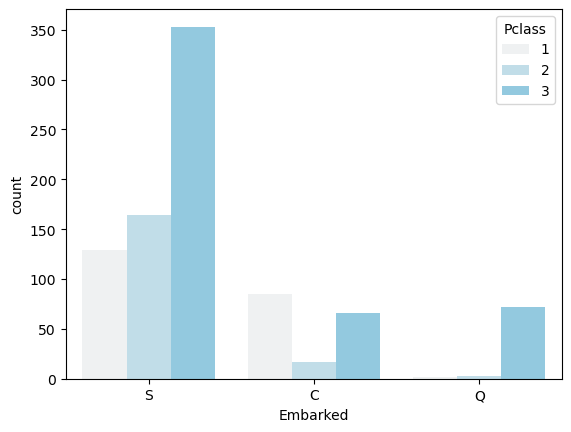

In [63]:
sns.countplot(data = train, x = "Embarked",hue = 'Pclass',color ='skyblue')

In [64]:
#수치형 데이터 시각화 방법
#빈도를 볼 수 있는 방법으로 시각화한다

#violinplot: 빈도를 볼 수 있는 그래프 분포를 보여줌

<Axes: xlabel='Sex', ylabel='Age'>

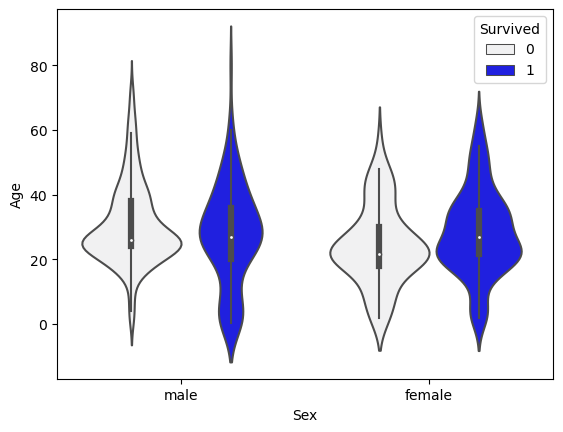

In [67]:
sns.violinplot(data =train,x = 'Sex', y = 'Age', hue = "Survived", color = 'blue')

<Axes: xlabel='Sex', ylabel='Age'>

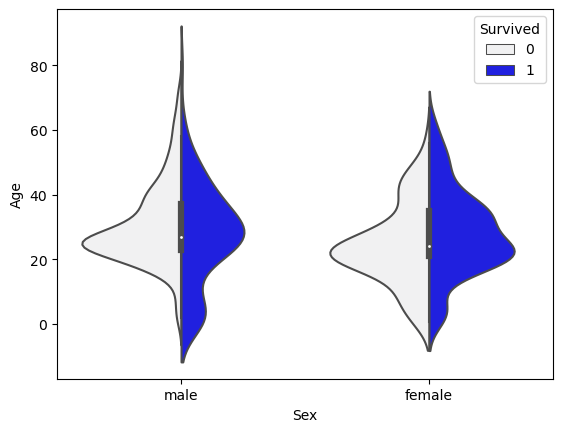

In [68]:
sns.violinplot(data =train,x = 'Sex', y = 'Age', hue = "Survived", color = 'blue',split ='True')

In [ ]:
#성별, 요금, 생존을 합쳐서 보기

<Axes: xlabel='Sex', ylabel='Fare'>

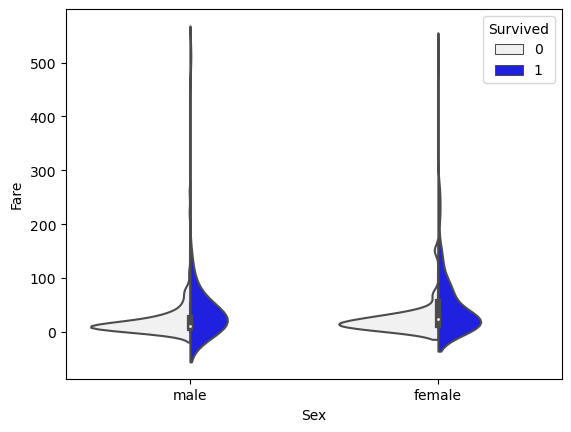

In [69]:
sns.violinplot(data =train,x = 'Sex', y = 'Fare', hue = "Survived", color = 'blue',split ='True')

In [ ]:
#sibSp(형제 자매), parch(부모, 자식)

<Axes: xlabel='SibSp', ylabel='count'>

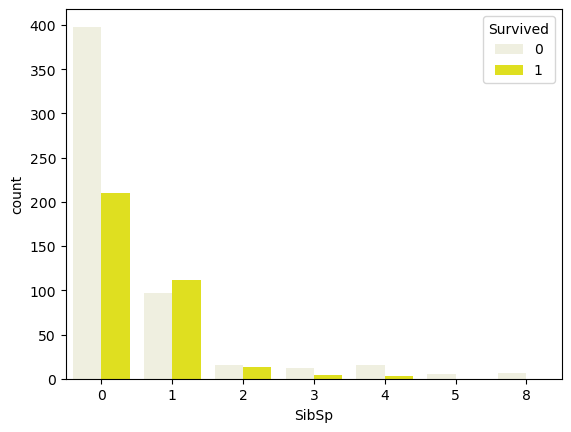

In [72]:
sns.countplot(data =train,x = 'SibSp', hue = 'Survived', color = 'yellow')

<Axes: xlabel='Parch', ylabel='count'>

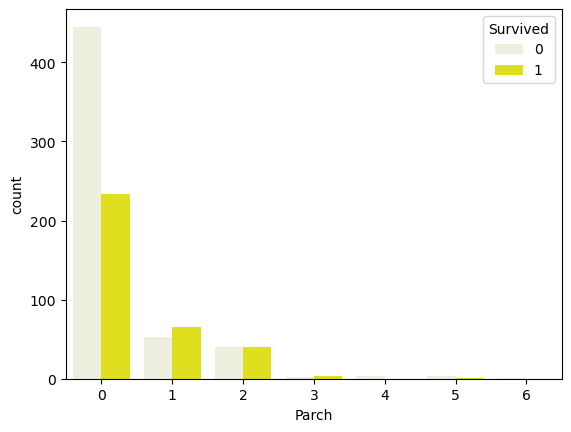

In [73]:
sns.countplot(data =train,x = 'Parch', hue = 'Survived', color = 'yellow')

In [ ]:
#특성공학
#컬럼에 연산읗 통해서 의미 있는 새로운 정보를 추출하는행위
#SibSp +Parch+1  = FamilySize

In [75]:
train['FamilySize'] = train['SibSp']+train["Parch"]+1

In [76]:
test['FamilySize'] = test['SibSp']+test["Parch"]+1

<Axes: xlabel='FamilySize', ylabel='count'>

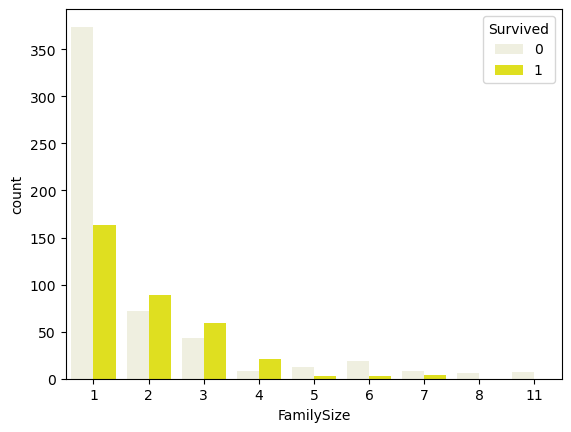

In [77]:
sns.countplot(data =train,x = 'FamilySize', hue = 'Survived', color = 'yellow')

In [ ]:
#한명일땐 죽은 비율이 높고 2_4명일때는 산 비율이 높다
#5명 이상일때는 죽은 비율이 높다'
#1명인 사람들은 Alone 
#2~4 명 Small
#5명이상 large

In [81]:
#구간정보
#구간에 대한 이름이 필요함
b=[0,1,4,20]
l = ['Alone ','Small','Large']

#이렇게 되면 0과 1사이의 구간(아ㅏㅍ에꺼 초과 두에꺼 이하)
           # 1초과 4 이하
           # 4초과 20이하

In [86]:
train["FamiyGroup"] = pd.cut(train["FamilySize"],bins =b, labels = l)

In [87]:
test["FamiyGroup"] = pd.cut(test["FamilySize"],bins =b, labels = l)

In [88]:
train.shape, test.shape

((891, 14), (418, 13))

In [ ]:
#아직 안본 데이터들  = test 데이터들
#name, Ticket


In [93]:
train["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
#데이터의 숫자를 줄일 수 있는 공통점을 찾아내야 한다
#가운데 있는 호칭만을 따로 빼와서 사용
teain["Name"]을 하나씩 가져와서 적용 가져오는 순간 행이나 열단위는 없어짐


In [99]:
train["Name"][0].split(",")[1].split(".")[0].strip()

'Mr'

In [ ]:
#이 방식을 전체 데이터에 적용시켜 주어야 한다
#tra
#apply행이나 열 단위로 복접한 계산을 할때 사용

In [104]:
def split_name(name):
    return name.split(',')[1].split(".")[0].strip()

In [105]:
train['Title'] = train["Name"].apply(split_name)
test['Title'] = test["Name"].apply(split_name)

In [ ]:
#title이라고 새로운 컬럼을 만들었으니 삭제

In [107]:
train.drop('Name',axis=1, inplace = True)

In [108]:
test.drop('Name',axis=1, inplace = True)

In [109]:
train.shape, test.shape

((891, 14), (418, 13))

In [110]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [111]:
train["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
#값이 1씩인게 많다 이것만이 표본이 되어 다음에 항상 이런 예상을 하게 만든다
#1~2개는 전부다 그냥 other로 바꿔줄것임

In [112]:
convert_name_dic = {
    'Mr' : 'Mr' ,
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Don' : 'Other',
    'Rev' : 'Rev',
    'Dr': 'Dr',
    'Mme' : 'Other',
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt' : 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [113]:
train["Title"] = train["Title"].map(convert_name_dic)
test["Title"] = test["Title"].map(convert_name_dic)

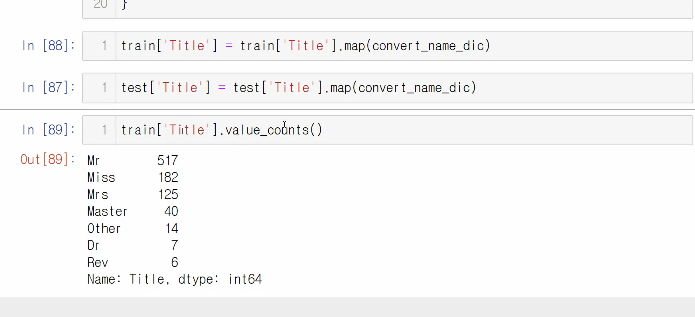

In [115]:
train["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Title, dtype: int64

In [117]:
#티켓은 공통점이 있기는 하나 추가적인 분석을 진행하기 힘듬
#ticket 삭제
train.drop("Ticket", axis =1, inplace = True)
test.drop("Ticket", axis =1, inplace = True)

In [118]:
train.shape, test.shape

((891, 13), (418, 12))

In [119]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,FamiyGroup,Title
0,1,0,3,male,22.0,1,0,7.2500,N,S,2,Small,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,3,1,3,female,26.0,0,0,7.9250,N,S,1,Alone,Miss
3,4,1,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,5,0,3,male,35.0,0,0,8.0500,N,S,1,Alone,Mr


In [120]:
#마지막으로 PassengerId는 생존에 영향을 끼치지 않으므로 삭제
train.drop("PassengerId", axis =1, inplace = True)
test.drop("PassengerId", axis =1, inplace = True)

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Cabin       891 non-null    object  
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  FamiyGroup  891 non-null    category
 11  Title       891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


In [ ]:
#타입이 오브젝트인것을 정수데이터로 바꿔줘야 한다

In [122]:
#y_ytrain만들기
y_train = train["Survived"]

In [123]:
train.drop('Survived', axis =1, inplace = True)

In [124]:
train.shape, test.shape

((891, 11), (418, 11))

In [131]:
#글자데이터를 숫자데이터로 변경
#원핫 인코딩
feature = ["Sex", "Cabin", "Embarked","FamiyGroup",'Title']

In [ ]:
#데이터가 많으면 상관없는데 데이터가 없으면 해야함
#가급적이면 train과 test합쳐서 원핫인코딩 하기
#따로따로 인코딩 해버리면 같은것도 있겠지만 test와 train의 값이 다르면 컬럼의 이름이 달라져버림
#그럼 학습할때 예측할때 둘다 문제 발생
#이걸 맞출려면 그냥 데이터를 하나로 맞춰버리면 된다 
#일단 합치고 어디까지가 train이였고 test인지만 기억하면 된다 

In [126]:
combined = pd.concat([train,test])
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,FamiyGroup,Title
0,3,male,22.0,1,0,7.2500,N,S,2,Small,Mr
1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,3,female,26.0,0,0,7.9250,N,S,1,Alone,Miss
3,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,3,male,35.0,0,0,8.0500,N,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,25.0,0,0,8.0500,N,S,1,Alone,Mr
414,1,female,39.0,0,0,108.9000,C,C,1,Alone,Other
415,3,male,38.5,0,0,7.2500,N,S,1,Alone,Mr
416,3,male,25.0,0,0,8.0500,N,S,1,Alone,Mr


전체는 1309개인데 417로 끝나는 이유
원래 있던번호 그냥 그대로 가지고 오는 것 0~891 끝나면 바로 test번호 붙여짐
이걸 해결할려면 

In [127]:
combined = pd.concat([train,test],ignore_index = True)
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,FamiyGroup,Title
0,3,male,22.0,1,0,7.2500,N,S,2,Small,Mr
1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,3,female,26.0,0,0,7.9250,N,S,1,Alone,Miss
3,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,3,male,35.0,0,0,8.0500,N,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,25.0,0,0,8.0500,N,S,1,Alone,Mr
1305,1,female,39.0,0,0,108.9000,C,C,1,Alone,Other
1306,3,male,38.5,0,0,7.2500,N,S,1,Alone,Mr
1307,3,male,25.0,0,0,8.0500,N,S,1,Alone,Mr


In [133]:
#원핫인코딩
one_hot = pd.get_dummies(combined[feature])

In [134]:
#이렇게 원핫인코딩을 했는데 아직 원래 값들이 남아있다
combined.drop(feature, axis =1, inplace = True)

In [ ]:
combined #원핫인코딩 필요없는 칼럼들

In [ ]:
one_hot # 원핫인코딩을 한 컬럼들

In [ ]:
#가로로 데이터를 우축에 붙일꺼여서 axis =1

In [135]:
combined = pd.concat([combined,one_hot], axis=1)

In [136]:
#train과 test의 분리
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [137]:
X_train.shape, X_test.shape, y_train.shape

((891, 30), (418, 30), (891,))